<a href="https://colab.research.google.com/github/shahrajesh2006/datascience/blob/main/adtk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install adtk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00


In [49]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/shahrajesh2006/datascience/main/data1.csv',index_col="_time", parse_dates=True, squeeze=True)
data.head()
data.dtypes
print(data)

<ipython-input-49-d135d6451ac3>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data=pd.read_csv('https://raw.githubusercontent.com/shahrajesh2006/datascience/main/data1.csv',index_col="_time", parse_dates=True, squeeze=True)


                                                ENDPOINT_ID  \
_time                                                         
2023-05-21 11:00:00-04:00  2e48fa0972b84e3fb1feaea549e953e1   
2023-05-21 11:05:00-04:00  2e48fa0972b84e3fb1feaea549e953e1   
2023-05-21 11:10:00-04:00  2e48fa0972b84e3fb1feaea549e953e1   
2023-05-21 11:15:00-04:00  2e48fa0972b84e3fb1feaea549e953e1   
2023-05-21 11:20:00-04:00  2e48fa0972b84e3fb1feaea549e953e1   
...                                                     ...   
2023-05-22 11:30:00-04:00  bac14af4097f43b2b90274bd652c1391   
2023-05-22 01:40:00-04:00  e6ebdd341e374e03a0d0f66695d160d9   
2023-05-22 01:40:00-04:00  ebcac394048e45269469d1fa09c3ce3b   
2023-05-22 01:40:00-04:00  f0a85b6175954fdfbc44bea70f1c9430   
2023-05-22 01:40:00-04:00  fe8274f4bda046f4be21a35831fed887   

                           UPSTREAM_RESPONSETIME  RESPONSETIME  XRESPONSETIME  
_time                                                                          
2023-05-21 11:00:00-

# New Section

In [51]:
df1 = data[data['ENDPOINT_ID']=='bac14af4097f43b2b90274bd652c1391']
df1 = df1.drop(columns=['ENDPOINT_ID', 'UPSTREAM_RESPONSETIME','RESPONSETIME'])
# df.head()
print(df1)

                           XRESPONSETIME
_time                                   
2023-05-21 11:00:00-04:00      46.942014
2023-05-21 11:05:00-04:00      46.648367
2023-05-21 11:10:00-04:00      47.896788
2023-05-21 11:15:00-04:00      48.839026
2023-05-21 11:20:00-04:00      46.866005
...                                  ...
2023-05-22 11:10:00-04:00      50.243875
2023-05-22 11:15:00-04:00      52.142070
2023-05-22 11:20:00-04:00      48.789012
2023-05-22 11:25:00-04:00      51.213963
2023-05-22 11:30:00-04:00      48.297083

[295 rows x 1 columns]


In [13]:
# df1 = pd.DataFrame()
# df1.index = pd.to_datetime(df['_time'])
# df1['XRESPONSETIME'] = df['XRESPONSETIME']
# # print(df1)

                           XRESPONSETIME
_time                                   
2023-05-21 11:00:00-04:00            NaN
2023-05-21 11:05:00-04:00            NaN
2023-05-21 11:10:00-04:00            NaN
2023-05-21 11:15:00-04:00            NaN
2023-05-21 11:20:00-04:00            NaN
...                                  ...
2023-05-22 11:10:00-04:00            NaN
2023-05-22 11:15:00-04:00            NaN
2023-05-22 11:20:00-04:00            NaN
2023-05-22 11:25:00-04:00            NaN
2023-05-22 11:30:00-04:00            NaN

[295 rows x 1 columns]


In [27]:
from adtk.data import validate_series
s = validate_series(df1)

###Threshold AD

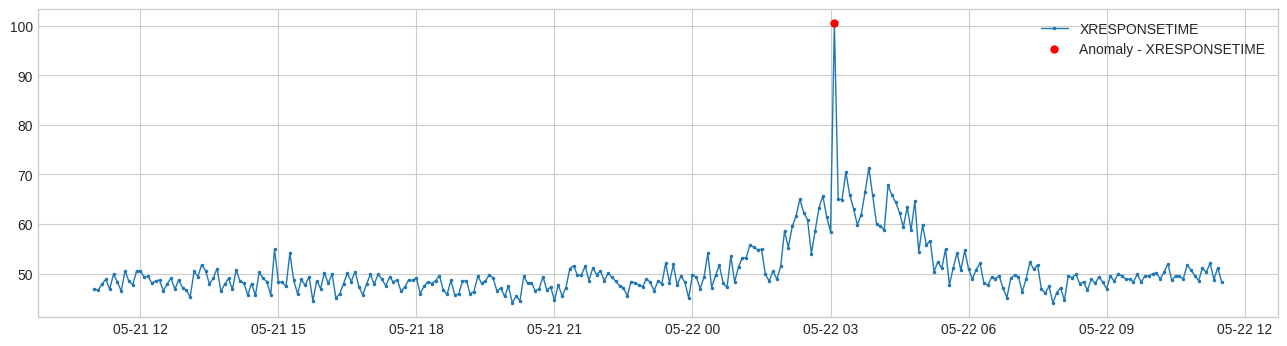

In [44]:
from adtk.detector import ThresholdAD
from adtk.visualization import plot
threshold_ad = ThresholdAD(high=80, low=25)
anomalies = threshold_ad.detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
# print(anomalies)

###Quantile AD

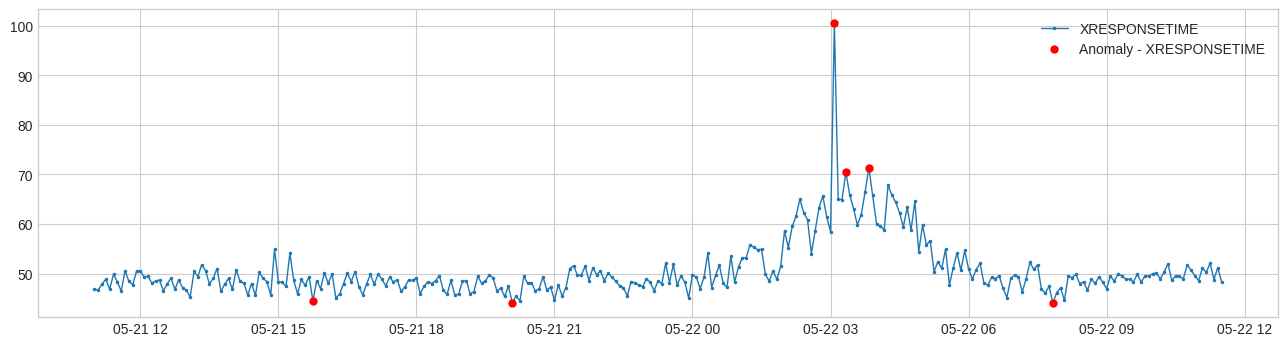

In [45]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

###InterQuartileRangeAD

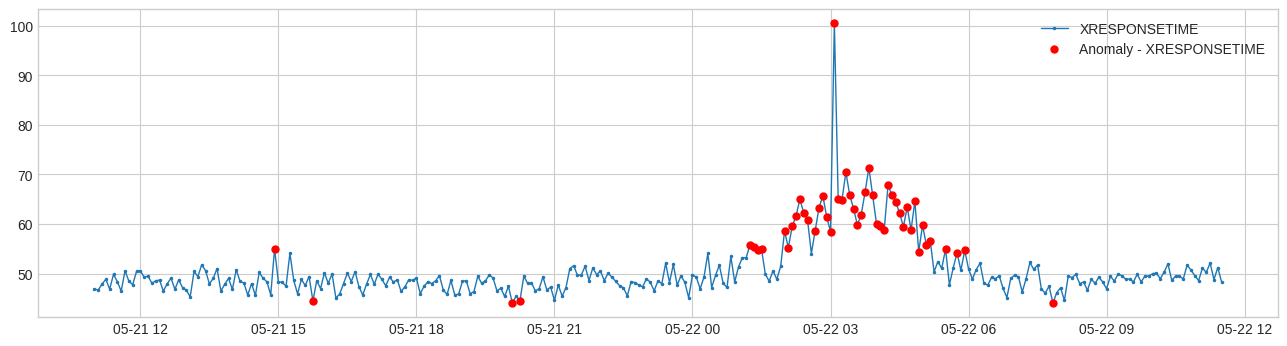

In [46]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1.0)
anomalies = iqr_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

###GeneralizedESDTestAD

In [34]:
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

### PersistAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


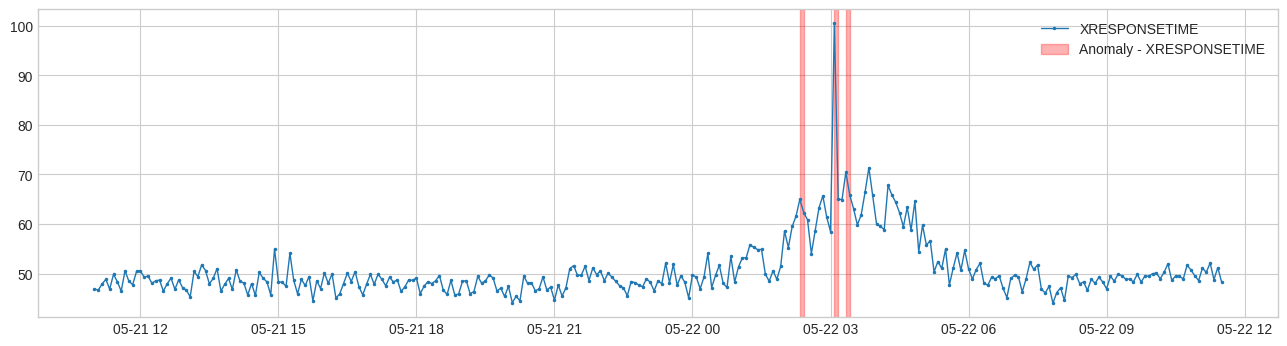

In [43]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='positive')
persist_ad.window = 24
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

### LevelShiftAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


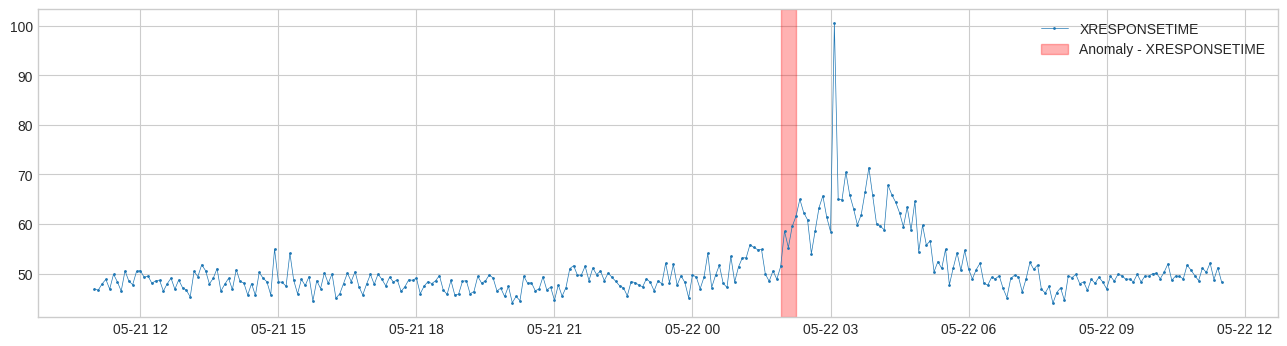

In [42]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=3.0, side='positive', window=5)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

### VolatilityShiftAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


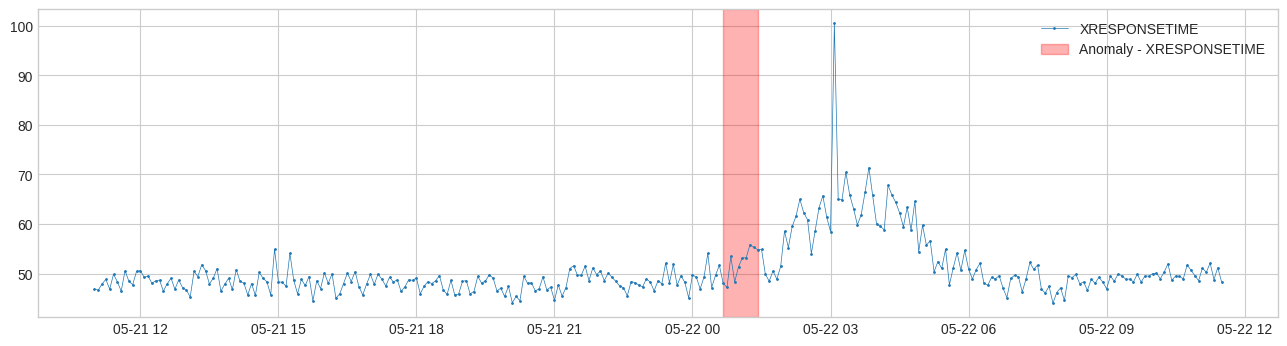

In [47]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

### SeasonalAD

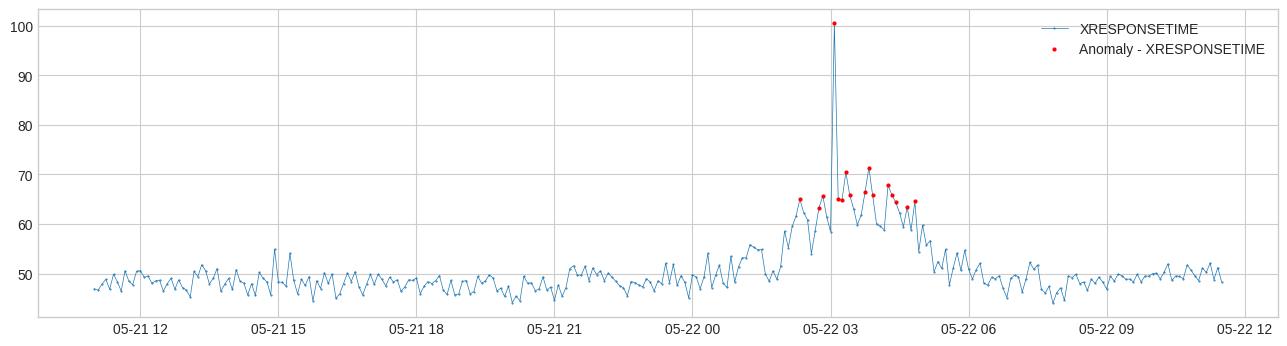

In [48]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=3.0, side="both")
anomalies = seasonal_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

Multivariate Data

In [57]:
df2 = data[data['ENDPOINT_ID']=='bac14af4097f43b2b90274bd652c1391']
df2 = df2.drop(columns=['ENDPOINT_ID','RESPONSETIME'])
# df.head()

df2['XRESPONSETIME'] = df2['XRESPONSETIME'].apply(lambda x: x*500)
print(df2)
s1 = validate_series(df2)

                           UPSTREAM_RESPONSETIME  XRESPONSETIME
_time                                                          
2023-05-21 11:00:00-04:00           23292.348676   23471.007065
2023-05-21 11:05:00-04:00           23301.154450   23324.183272
2023-05-21 11:10:00-04:00           23236.333238   23948.394241
2023-05-21 11:15:00-04:00           23346.212710   24419.513124
2023-05-21 11:20:00-04:00           23412.593313   23433.002647
...                                          ...            ...
2023-05-22 11:10:00-04:00           23316.919832   25121.937522
2023-05-22 11:15:00-04:00           23264.942222   26071.035218
2023-05-22 11:20:00-04:00           23353.765273   24394.505833
2023-05-22 11:25:00-04:00           23399.186407   25606.981441
2023-05-22 11:30:00-04:00           23272.770293   24148.541284

[295 rows x 2 columns]


### AutoregressionAD

In [58]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(s1)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

RuntimeError: ignored

### MinClusterDetector

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


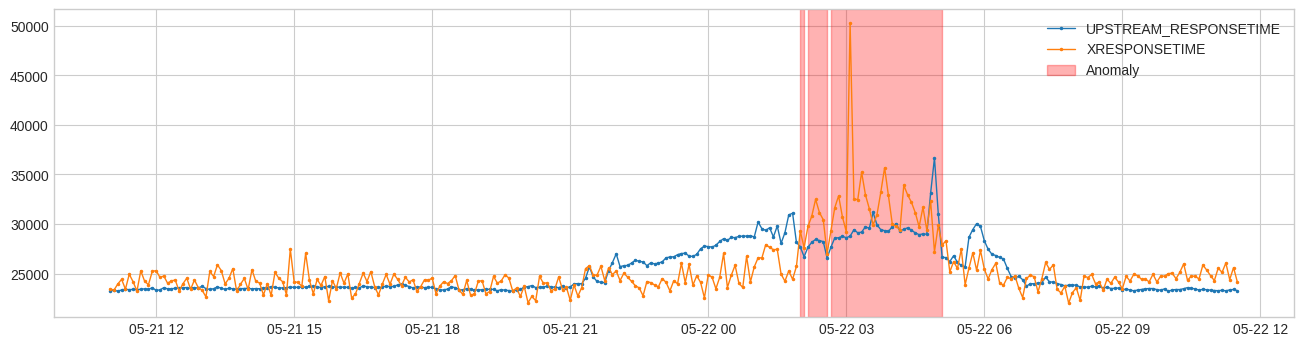

In [59]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

###OutlierDetector

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


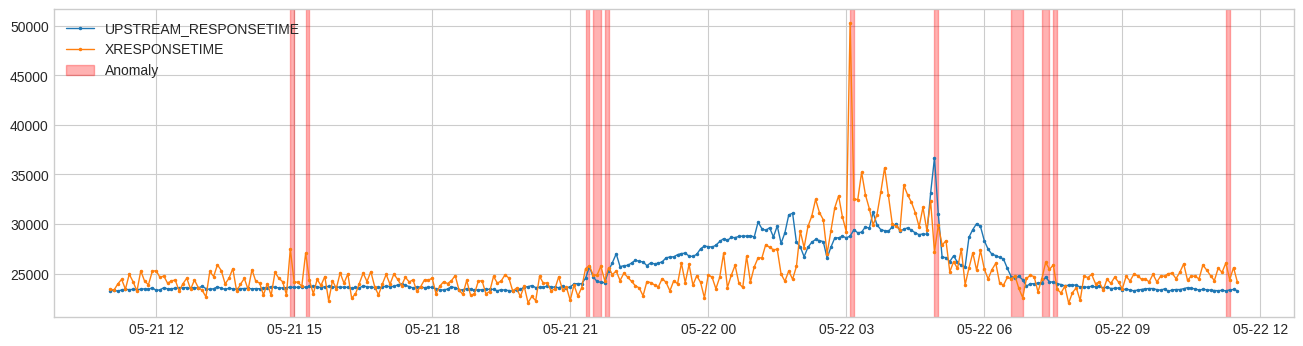

In [60]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

###RegressionAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


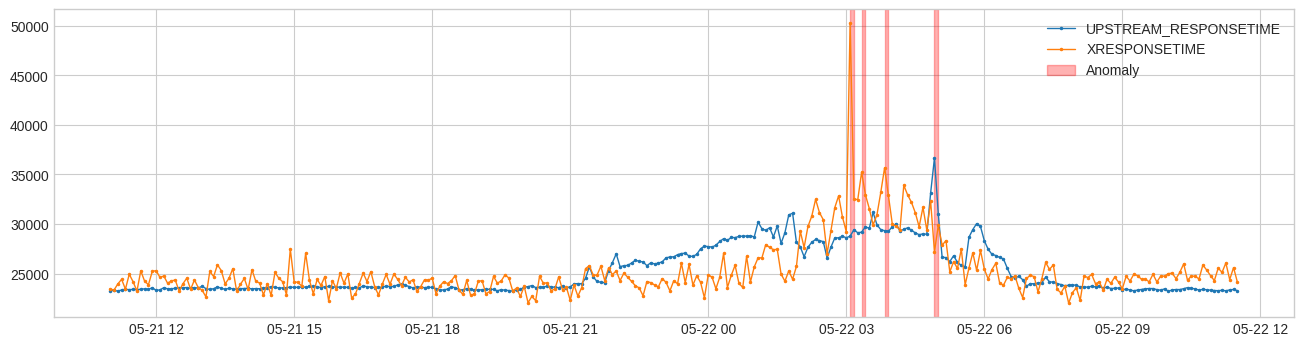

In [62]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
regression_ad = RegressionAD(regressor=LinearRegression(), target="XRESPONSETIME", c=3.0)
anomalies = regression_ad.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

### PcaAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


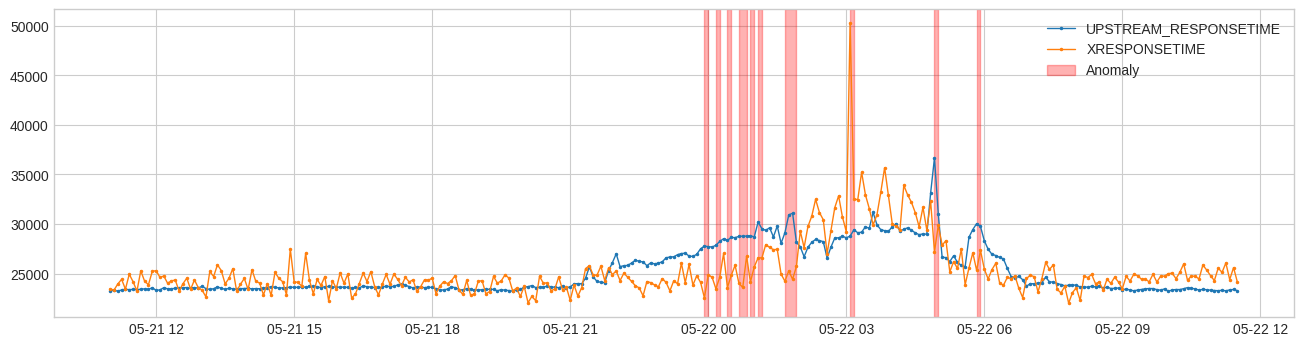

In [63]:
from adtk.detector import PcaAD
pca_ad = PcaAD(k=1)
anomalies = pca_ad.fit_detect(s1)
plot(s1, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');